In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import pickle 

ModuleNotFoundError: No module named 'tensorflow'

In [24]:
from tensorflow import keras

from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [25]:
with open("jet_output.pkl", "rb") as f:
    output = pickle.load( f )

In [72]:
genjetdata = []
for i in range(557):
    for pt in output[i*2]:
        genjetdata.append(pt)


In [75]:
recojetdata = []
for i in range(557):
    for pt in output[i*2+1]:
        recojetdata.append(pt)


In [78]:
genjetdata = np.array(genjetdata)
recojetdata = np.array(recojetdata)

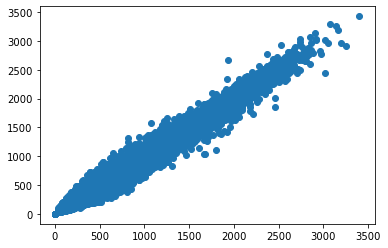

In [79]:
plt.scatter(genjetdata,recojetdata)

In [82]:
# dataset = pd.read_csv("regression_data.csv")
dataset = pd.DataFrame({"GenJet_pt":genjetdata[1:],
                       "Jet_pt":recojetdata[1:]})

In [83]:
dataset.head(5)

,GenJet_pt,Jet_pt
0,633.190002,574.50
1,607.509888,614.50
2,835.091492,837.00
3,435.545349,474.75
4,505.575562,528.00


In [84]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [85]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Jet_pt')
test_labels = test_features.pop('Jet_pt')

In [86]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [92]:
genjet = np.array(train_features['GenJet_pt'])

genjet_normalizer = layers.Normalization(input_shape=[1,], axis=None)
genjet_normalizer.adapt(genjet)

In [93]:
genjet_pt_model = tf.keras.Sequential([
    genjet_normalizer,
    layers.Dense(units=1)
])

genjet_pt_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_9 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_17 (Dense)            (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [94]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [95]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

In [96]:
genjet_pt = np.array(train_features['GenJet_pt'])

genjet_pt_normalizer = layers.Normalization(input_shape=[1,], axis=None)
genjet_pt_normalizer.adapt(genjet_pt)


In [97]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

ValueError: The last dimension of the inputs to a Dense layer should be defined. Found None. Full input shape received: (None, None)

In [44]:
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

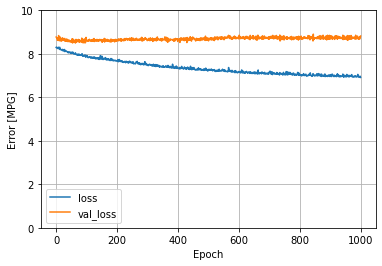

In [45]:
plot_loss(history)

In [37]:
test_results = {}
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

4/4 [==============================] - 0s 2ms/step


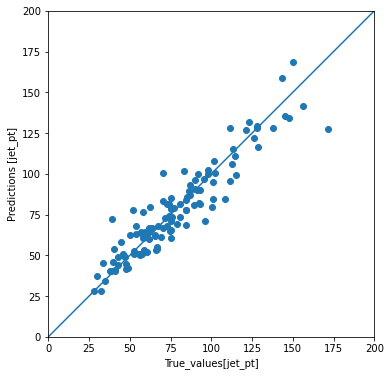

In [43]:
test_predictions = dnn_model.predict(test_features).flatten()
plt.figure(figsize = (6,6))
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True_values[jet_pt]')
plt.ylabel('Predictions [jet_pt]')
lims = [0, 200]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [98]:
dnn_genjet_pt_model = build_and_compile_model(genjet_normalizer)

In [99]:
dnn_genjet_pt_model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_9 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_21 (Dense)            (None, 64)                128       
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 dense_23 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [ ]:
history = dnn_genjet_pt_model.fit(
    train_features['GenJet_pt'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

In [ ]:
plot_loss(history)


4/4 [==============================] - 0s 4ms/step


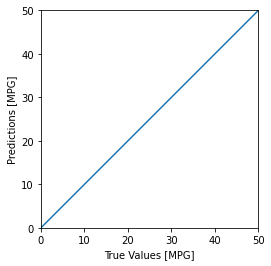

In [52]:
test_predictions = dnn_genjet_pt_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [62]:
output[5].shape

(1017,)